In [1]:
3import thr libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# Load the dataset
df = pd.read_csv("advertising.csv")
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
# Dataset shape
df.shape

(200, 4)

In [9]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# Statistical summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
#checking the missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

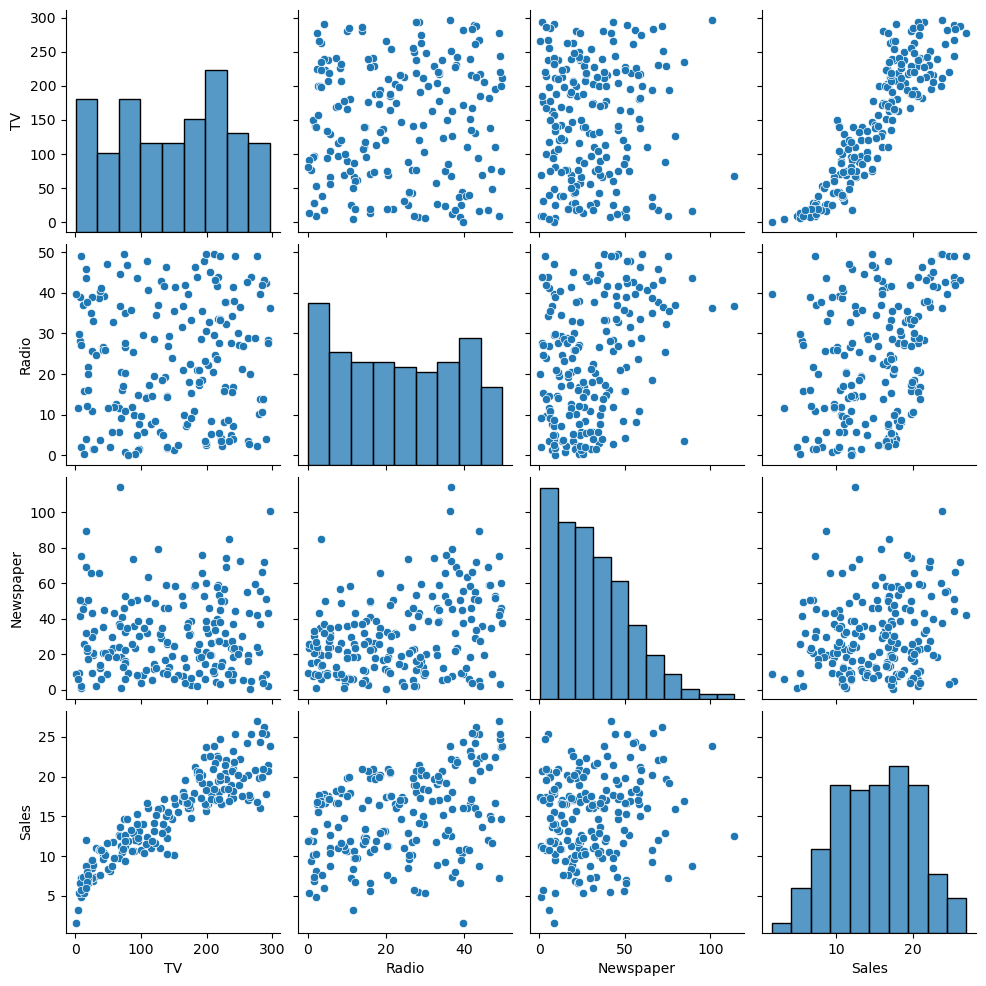

In [14]:
#Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

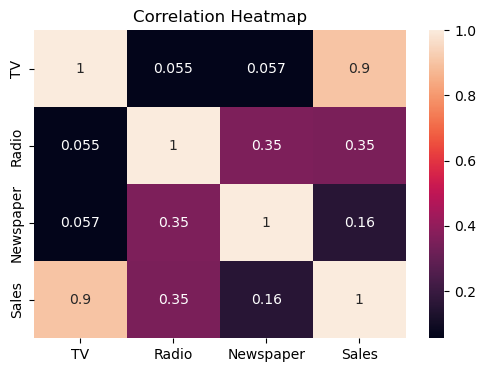

In [17]:
#correlation heat map
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()             # Higher correlation = stronger impact on sales.

In [23]:
#Feature Selection
# Independent variables
X = df[['TV', 'Radio', 'Newspaper']]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
# Dependent variable
y = df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [26]:
#train  split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
#Model Creation (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
#make predictionw
y_pred = model.predict(X_test)

In [30]:
#model evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)


R2 Score: 0.9059011844150826
Mean Squared Error: 2.9077569102710905


In [35]:
#comparing  actual vs predicted
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred,
    'difference':y_test - y_pred
})

comparison.head()


,Actual Sales,Predicted Sales,difference
95,16.9,17.034772,-0.134772
15,22.4,20.409740,1.990260
30,21.4,23.723989,-2.323989
158,7.3,9.272785,-1.972785
128,24.7,21.682719,3.017281


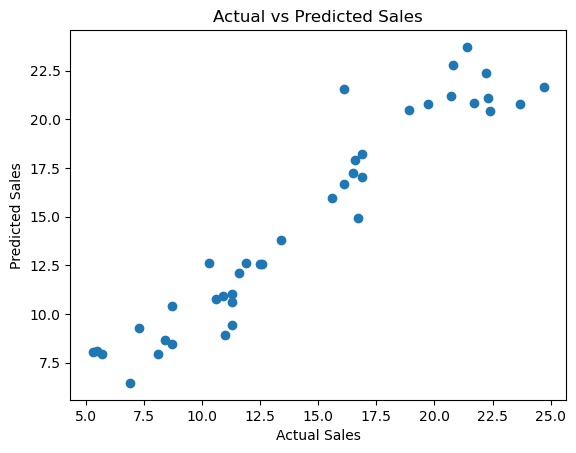

In [36]:
#visual prediction
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [37]:
#Predict Sales for New Advertising Budget
new_data = pd.DataFrame({
    'TV': [150],
    'Radio': [25],
    'Newspaper': [30]
})

predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 15.54425049228201


In [38]:
#Model Coefficients (Business Insight)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients


,Feature,Coefficient
0,TV,0.054509
1,Radio,0.100945
2,Newspaper,0.004337


# key insights 
1️⃣ Advertising Spend Has a Direct Impact on Sales

The analysis reveals a strong positive relationship between advertising expenditure and sales performance. Among all channels, TV advertising shows the highest influence on sales, indicating that increased investment in TV campaigns significantly boosts revenue.

2️⃣ Radio Advertising Provides Moderate Sales Growth

Radio advertising contributes positively to sales but with a comparatively lower impact than TV. This suggests that radio campaigns are effective as a supporting marketing channel rather than the primary driver of sales.

3️⃣ Newspaper Advertising Has Limited Influence

The model indicates that newspaper advertising has minimal impact on sales outcomes. This insight highlights an opportunity for businesses to optimize marketing budgets by reallocating spending from less effective channels.

4️⃣ Linear Regression Model Performs Effectively

The Linear Regression model demonstrates strong predictive capability, as reflected by a high R² score and low Mean Squared Error. This confirms that the selected advertising features explain a significant portion of sales variability.

5️⃣ Data-Driven Decision Making is Enabled

By quantifying the contribution of each advertising channel, the project enables evidence-based marketing decisions, allowing organizations to prioritize high-return advertising strategies.

6️⃣ Predictive Insights Support Business Planning

The trained model can forecast future sales for given advertising budgets, supporting:

Budget planning

Campaign performance estimation

Revenue forecasting

7️⃣ Actionable Business Recommendations

Based on the insights:

Increase investment in TV advertising for higher sales impact

Use Radio advertising strategically to complement TV campaigns

Re-evaluate or reduce Newspaper advertising spend to improve ROI